Example following Ria's notebook and the reference
https://www.analyticsvidhya.com/blog/2021/10/machine-learning-for-stock-market-prediction-with-step-by-step-implementation/#h2_8

In [82]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
import os
import yfinance as yf

from sklearn.model_selection import TimeSeriesSplit
import tensorflow as tf
from tensorflow import keras
from keras import metrics
from keras.layers import LSTM

import datetime

from keras.utils.vis_utils import plot_model
#Plotly Method Imports
import plotly # You can use matplotlib as well for these plots as well
import cufflinks as cf 
cf.go_offline()

In [98]:
import pandas as pd
import altair as alt
now = datetime.datetime.now()
print("Last updated:", now.strftime("%Y-%m-%d" + " at "+ "%H:%M:%S"))

Last updated: 2022-06-20 at 21:49:50


In [135]:
# download data for Coca cola KO
stock_df = yf.download('KO', 
                      start='2012-01-01', 
                      end='2022-06-01', 
                      progress=False,
)
stock_df.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-24,62.880001,64.190002,62.750000,64.019997,63.560772,16154200
2022-05-25,64.000000,64.470001,63.599998,64.070000,63.610416,15360500
2022-05-26,64.070000,65.099998,63.959999,64.300003,63.838772,16159800
2022-05-27,64.260002,64.830002,64.139999,64.680000,64.216042,17709000
2022-05-31,64.080002,64.320000,63.049999,63.380001,62.925369,43159000


In [137]:
## OPENING PRICE
opening_price = alt.Chart(stock_df.reset_index()).mark_line().encode(
    alt.X("Date", title = "Date"),
    alt.Y("Adj Close", title = "Adj Close"),
    tooltip= ['Date', 'Open', 'High', 'Low','Adj Close' ,'Volume']
).properties(
    width=600, height=200
)

opening_price

alt.Chart(...)

In [153]:
#Print the shape of Dataframe  and Check for Null Values
print('Dataframe Shape: ', stock_df. shape)
print('Null Value Present: ', stock_df.isnull().values.any())

Dataframe Shape:  (2620, 6)
Null Value Present:  False


In [154]:
#Set Target Variable
output_var = pd.DataFrame(stock_df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [155]:
output_var

,Adj Close
Date,
2012-01-03,25.261478
2012-01-04,25.103006
2012-01-05,24.984156
2012-01-06,24.825682
2012-01-09,24.825682
...,...
2022-05-24,63.560772
2022-05-25,63.610416
2022-05-26,63.838772


In [156]:
# Scaling features

scaler = MinMaxScaler()

feature_transform = scaler.fit_transform(stock_df[features])

feature_transform= pd.DataFrame(columns=features, data=feature_transform, index= stock_df.index)

feature_transform.describe()

,Open,High,Low,Volume
count,2620.000000,2620.000000,2620.000000,2620.000000
mean,0.352016,0.357563,0.363764,0.119197
std,0.196150,0.197536,0.199625,0.065915
min,0.000000,0.000000,0.000000,0.000000
25%,0.213012,0.216366,0.222445,0.078408
50%,0.305951,0.311483,0.316325,0.105043
75%,0.461325,0.470285,0.473254,0.141513
max,1.000000,1.000000,1.000000,1.000000


In [157]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()


In [158]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [159]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

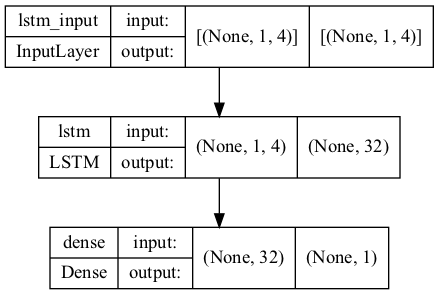

In [160]:
#Building the LSTM Model
lstm = keras.Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(keras.layers.Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [161]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100


2022-06-20 22:37:51.479678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


298/298 [==============================] - 4s 12ms/step - loss: 1255.3740
Epoch 2/100
298/298 [==============================] - 3s 11ms/step - loss: 661.7272
Epoch 3/100
298/298 [==============================] - 3s 11ms/step - loss: 146.1651
Epoch 4/100
298/298 [==============================] - 3s 11ms/step - loss: 24.4843
Epoch 5/100
298/298 [==============================] - 3s 11ms/step - loss: 13.7012
Epoch 6/100
298/298 [==============================] - 3s 11ms/step - loss: 11.5594
Epoch 7/100
298/298 [==============================] - 3s 11ms/step - loss: 10.0044
Epoch 8/100
298/298 [==============================] - 3s 11ms/step - loss: 8.6335
Epoch 9/100
298/298 [==============================] - 3s 11ms/step - loss: 7.3918
Epoch 10/100
298/298 [==============================] - 3s 11ms/step - loss: 6.3302
Epoch 11/100
298/298 [==============================] - 3s 11ms/step - loss: 5.4531
Epoch 12/100
298/298 [==============================] - 3s 11ms/step - loss: 4.7513
Ep

In [162]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

2022-06-20 22:43:14.906993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


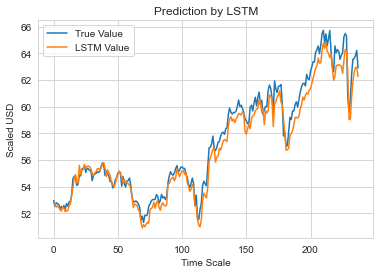

In [163]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()